**4月20日の課題**  
1922076 南 昂汰 G4

1. 自分の好きな正方形の写真を読み込み、複素平面上に表示するプログラムを作成

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#先生が用意してくださった関数
from PIL import Image
def imgfile2bin(filename):
    threshold = 100
    img = np.array(Image.open(filename).convert('L').resize((200, 200)))
    img_bool = img > threshold
    c_img = np.array([])
    for i in range(img_bool.shape[0]):
        for j in range(img_bool.shape[1]):
            if img_bool[i,j]==False:
                c_img=np.append(c_img,complex(j,(img_bool.shape[0]-1)-i))
    return c_img

In [59]:
#ドライブをマウント
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#画像の読み込み
img=imgfile2bin("/content/drive/My Drive/Colab Notebooks/pencil-shirokuro.png")

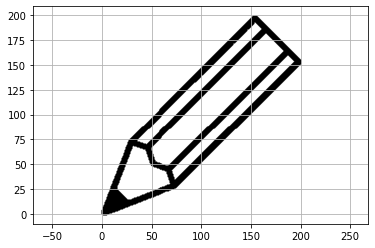

In [61]:
#複素平面上にプロットして表示
plt.scatter(img.real,img.imag,s=1,color="black")
plt.axis("equal")
plt.grid(which="major")
plt.show()

2. 1の画像を極座標形式に変換し、2倍拡大した上で120度回転させた画像を表示

In [0]:
import cmath
import math

#複素数を要素とする配列から[𝑟,𝜃](𝜃は度数法)を要素とする新しい配列を返す関数com2polar(arr)
def com2polar(arr):
    p_arr = np.array([])
    for value in arr:
        p_arr=np.append(p_arr, np.array([cmath.polar(value)[0], math.degrees(cmath.polar(value)[1])]))
    p_arr = p_arr.reshape([arr.shape[0], 2])
    return p_arr

#[𝑟,𝜃](𝜃は度数法)を要素とする配列から複素数を要素とする新しい配列を返す関数polar2com(arr)
def polar2com(arr):
    c_arr = np.array([])
    for value in arr:
        c_arr=np.append(c_arr,[cmath.rect(value[0],math.radians(value[1]))])
    return c_arr

In [63]:
#元の複素数
img

array([152.+199.j, 153.+199.j, 154.+199.j, ...,   2.  +0.j,   3.  +0.j,
         4.  +0.j])

In [64]:
#画像を極座標形式に変換
p_img=com2polar(img)
#2倍拡大
p_img[:,0]=p_img[:,0]*2
#120度回転
p_img[:,1]=p_img[:,1]+120
#複素数に戻す
c_img=polar2com(p_img)
c_img

array([-496.67811071+64.27172275j, -497.67811071+66.00377356j,
       -498.67811071+67.73582437j, ...,   -2.         +3.46410162j,
         -3.         +5.19615242j,   -4.         +6.92820323j])

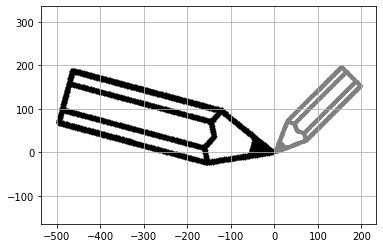

In [65]:
#複素平面上にプロットして表示
plt.scatter(img.real,img.imag,s=1,color="gray")
plt.scatter(c_img.real,c_img.imag,s=1,color="black")
plt.axis("equal")
plt.grid(which="major")
plt.show()

3. 複素数、複素平面、極座標を用いて平行移動、拡大・縮小、回転をさせることで自由な作品を作成

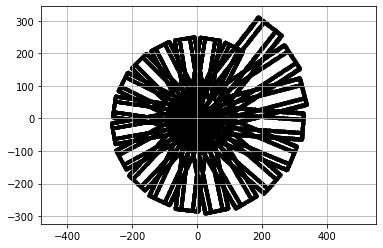

In [66]:
#リストxを作成
x=[com2polar(img)]*20
#aは1.000です
a=1.000

#リストxの要素を前から順に1つずつ変数iに代入しながらforのブロックを実行
for i in x:
  #a倍拡大
  i[:,0]=i[:,0]*a
  #(a*18)度回転
  i[:,1]=i[:,1]+a*18
  #複素数に戻す
  i=polar2com(i)
  #複素平面上にプロット
  plt.scatter(i.real,i.imag,s=1,color="black")
  #aに0.002を加算
  a+=0.002

#表示
plt.axis("equal")
plt.grid(which="major")
plt.show()